In [1]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.stats as stats
import sys

sys.path.insert(1, '/home/jaimerz/Documents/UCL/qp/src')
import qp

SyntaxError: invalid syntax (projector_shifts_widths.py, line 71)

# Load Data

In [ ]:
dummy = np.load('../tests/qp/dummy.npz')
zs = dummy['zs']
pzs = dummy['pzs']
dz = np.mean(np.diff(zs))
zs_edges = np.append(zs - dz/2, zs[-1] + dz/2)
q = qp.Ensemble(qp.hist, data={"bins":zs_edges, "pdfs":pzs})

In [ ]:
base = qp.projectors.ProjectorBase(q)

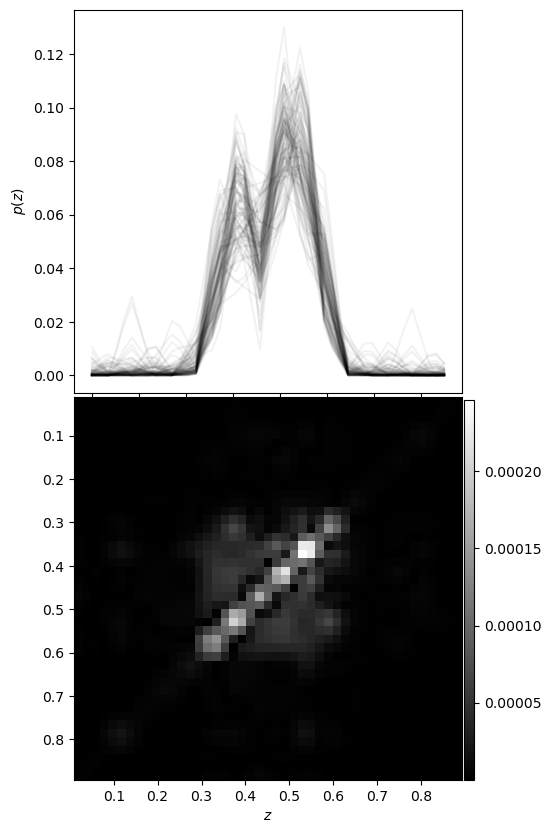

In [ ]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    axis[0].plot(base.z, base.nzs[i], 'k-', alpha=0.05)
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(base.nz_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
plt.show()

# Shifts

In [ ]:
shifts = qp.projectors.ProjectorShifts(q)

In [ ]:
pz_fid = [shifts.z, shifts.nz_mean]

In [ ]:
shifted_pzs = np.array([shifts.evaluate_model(pz_fid, shifts.sample_prior())[1] for i in range(100)])

In [ ]:
shifted_cov = np.cov(shifted_pzs.T)

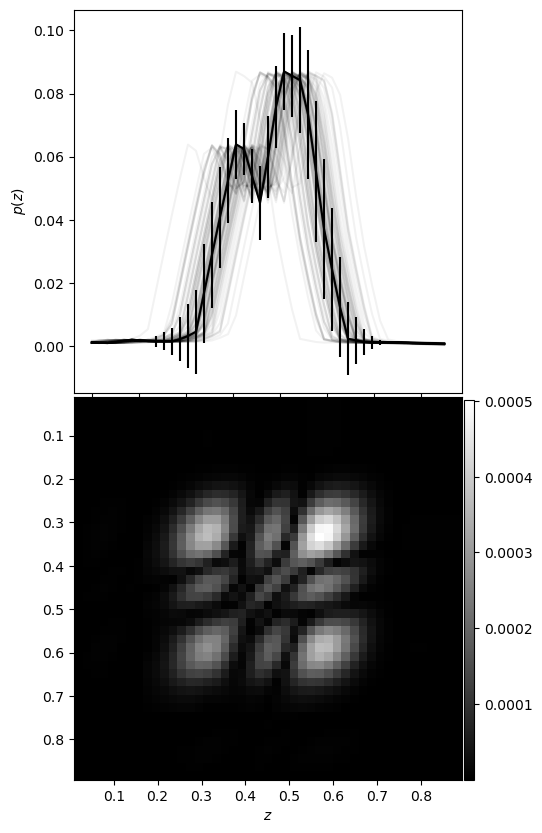

In [ ]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    pz = shifted_pzs[i]
    axis[0].plot(shifts.z, pz, 'k-', alpha=0.05)
axis[0].errorbar(shifts.z, shifts.nz_mean, yerr=np.sqrt(np.diag(shifted_cov)), fmt='k-')
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(shifted_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
#plt.savefig('docs/source/assets/shifts.png')
plt.show()

# Shifts & Widths

In [ ]:
SnW = qp.projectors.ProjectorShiftsWidths(q)

In [ ]:
SnW_pzs = []
for i in range(100):
    shift_p = SnW._get_shift_prior()
    width_p = SnW._get_width_prior()
    shift = shift_p.rvs()
    width = width_p.rvs()
    pz = SnW.evaluate_model(pz_fid, shift, width)[1]
    SnW_pzs.append(pz)
SnW_pzs = np.array(SnW_pzs)
#SnW_pzs = base._normalize(SnW_pzs)

In [ ]:
SnW_cov = np.cov(SnW_pzs.T)

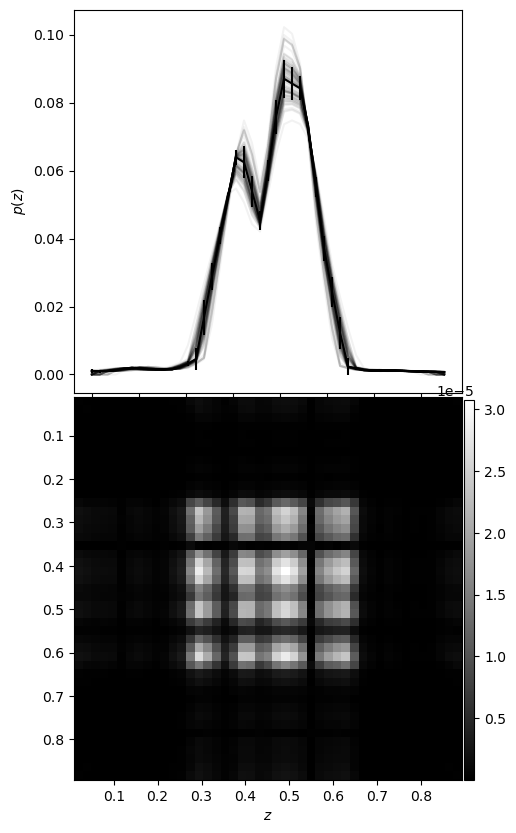

In [ ]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    axis[0].plot(SnW.z, SnW_pzs[i], 'k-', alpha=0.05)
axis[0].errorbar(SnW.z, SnW.nz_mean, yerr=np.sqrt(np.diag(SnW_cov)), fmt='k-')
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(SnW_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
#plt.savefig('docs/source/assets/moments.png')
plt.show()

# Moments

In [ ]:
moments = qp.projectors.ProjectorMoments(q)

The covariance matrix will be regularized
The covariance matrix will be diagonalized


In [ ]:
moments_pzs = np.array([moments.evaluate_model(pz_fid, moments.sample_prior())[1] for i in range(100)])

In [ ]:
moments_cov = np.cov(moments_pzs.T)

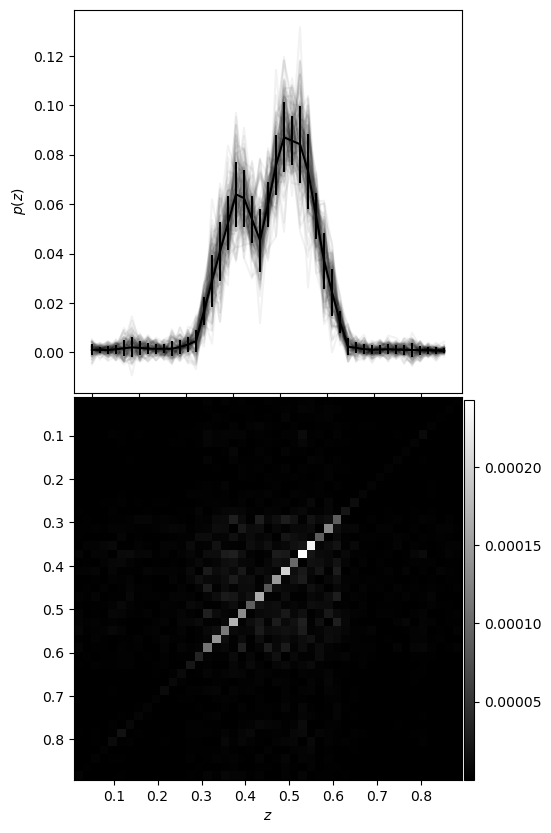

In [ ]:
figure, axis = plt.subplots(2, 1, figsize=(5,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(100):
    axis[0].plot(moments.z, moments_pzs[i], 'k-', alpha=0.05)
axis[0].errorbar(moments.z, moments.nz_mean, yerr=np.sqrt(np.diag(moments_cov)), fmt='k-')
axis[0].set_ylabel(r'$p(z)$')
im = axis[1].imshow(abs(moments_cov), aspect='auto',
                    origin='lower', cmap='gray',
                    extent=[min(zs), max(zs), max(zs), min(zs)])
axis[1].set_xlabel(r'$z$')
cbar_ax = figure.add_axes([0.905, 0.11, 0.02, 0.38])
figure.colorbar(im, cax=cbar_ax)
#plt.savefig('docs/source/assets/moments.png')
plt.show()